In [1]:
import pandas as pd

In [2]:
url=("http://www.buckscounty.org/government/Finance/BoardofAssessment/MillageRates")

In [9]:
tables=pd.read_html(url,header=0)

In [11]:
df1=tables[3]

In [14]:
df1=df1.drop(columns={"Unnamed: 0"}).drop([54])

In [15]:
df1

,Township/Boro,School District,2018 Twp/Boro Millage,2018/2019 School Mills,Total Millage
0,Bedminster Twp,Pennridge SD,7.50000,135.2555,167.20550
1,Bensalem Twp,Bensalem SD,19.50000,159.1731,203.12310
2,Bridgeton Twp,Palisades SD,6.00000,114.3000,144.75000
3,Bristol Boro,Bristol Boro SD,57.89000,154.0000,236.34000
4,Bristol Twp,Bristol Twp SD,23.98000,220.1400,268.57000
5,Buckingham Twp,Central Bucks SD,4.00000,124.1000,152.55000
6,Chalfont Boro,Central Bucks SD,18.25000,124.1000,166.80000
7,Doylestown Boro,Central Bucks SD,13.17500,124.1000,161.72500
8,Doylestown Twp,Central Bucks SD,11.87500,124.1000,160.42500
9,Dublin Boro,Pennridge SD,18.25000,135.2555,177.95550


In [16]:
df2=pd.read_csv("bucks_home_values.csv")

In [18]:
df3=pd.merge(df1,df2,on='Township/Boro')

In [20]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 53
Data columns (total 6 columns):
Township/Boro                     54 non-null object
School District                   54 non-null object
2018 Twp/Boro Millage             54 non-null float64
2018/2019  School Mills           53 non-null float64
Total Millage                     53 non-null float64
average_residential_home value    54 non-null int64
dtypes: float64(3), int64(1), object(2)
memory usage: 3.0+ KB


In [30]:
df3.columns=df3.columns.str.replace(" ","_").str.replace("__",'_').str.replace("/",'_').str.lower().str.strip()

In [31]:
df3.rename(columns={"2018_twp_boro_millage":"twp_boro_millage_18",'2018_2019_school_mills':'school_mills_18'},inplace=True)

In [39]:
df3['county_millage_18']=24.45

In [41]:
#df3['ave_muni_bill']=((df3.twp_boro_millage_18*df3.average_residential_home_value)/1000).round(2)
df3['ave_school_bill']=((df3.school_mills_18*df3.average_residential_home_value)/1000).round(2)
df3['ave_county_bill']=((df3.county_millage_18*df3.average_residential_home_value)/1000).round(2)
df3['ave_total_bill']=((df3.total_millage*df3.average_residential_home_value)/1000).round(2)

In [43]:
df3.columns

Index(['township_boro', 'school_district', 'twp_boro_millage_18',
       'school_mills_18', 'total_millage', 'average_residential_home_value',
       'ave_muni_bill', 'county_millage_18', 'ave_school_bill',
       'ave_county_bill', 'ave_total_bill'],
      dtype='object')

In [45]:
df3=df3[['township_boro', 'school_district', 'twp_boro_millage_18',
       'school_mills_18','county_millage_18', 'total_millage', 'average_residential_home_value',
       'ave_muni_bill', 'ave_school_bill',
       'ave_county_bill', 'ave_total_bill']]

In [51]:
import matplotlib
%matplotlib inline

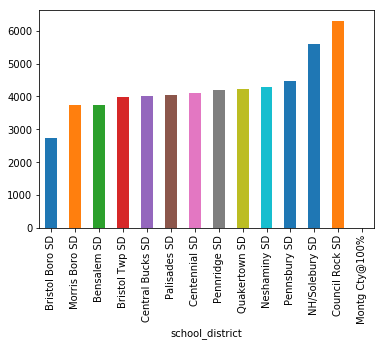

In [62]:
df3.groupby("school_district").ave_school_bill.mean().sort_values().plot.bar()

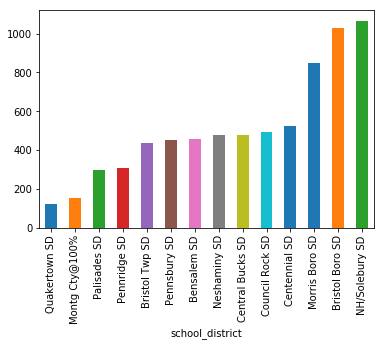

In [63]:
df3.groupby("school_district").ave_muni_bill.mean().sort_values().plot.bar()